<a href="https://colab.research.google.com/github/fiza-azam/Machine-Learning-Projects/blob/main/Project_Salary_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Salary_Data.csv')
data.head(10)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a3ba6be90>,
      dtype=object)

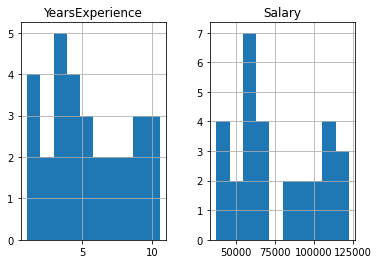

In [13]:
data.hist()

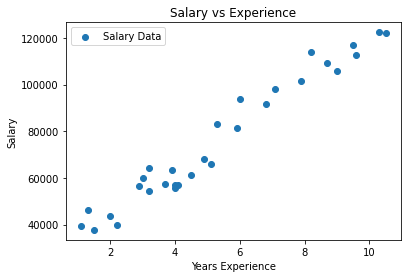

In [24]:
import matplotlib.pyplot as plt
salary = data['Salary']
experience = data['YearsExperience']
plt.scatter(experience, salary, label='Salary Data')
plt.title("Salary vs Experience")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()

In [21]:
fig = px.line(data, x = 'YearsExperience', y = 'Salary', title='Salary vs Experience Data', height=500, width=500)
fig.show()

In [47]:
#Hypothesis
parameters = {'y_intercept' : 1000, 'slope':5000 }
def y_hat(experience, params):
  y_intercept = params['y_intercept']
  slope = params['slope']
  return y_intercept + slope * experience

y_hat(5, parameters)

26000

<h3>Linear Regression Using Least Square Method</h3>

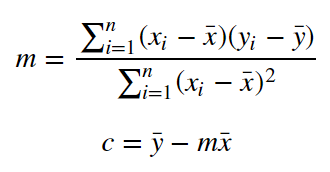

In [48]:
def learn_parameters(data, params):
  x,y = data['YearsExperience'], data['Salary']
  x_bar, y_bar = x.mean(), y.mean()
  x,y = x.to_numpy(), y.to_numpy()
  slope = sum((x-x_bar)*(y-y_bar))/sum((x-x_bar)**2) #slope is a single number
  y_intercept = y_bar - (slope*x_bar)
  
  #update parameters
  params['y_intercept'] = y_intercept
  params['slope'] = slope


new_params = {'y_intercept':0, 'slope':0}
learn_parameters(data, new_params)
new_params

{'slope': 9449.962321455077, 'y_intercept': 25792.20019866869}

In [55]:
#untrain Predictions using dummy data
demo_experience = list(range(1, 13)) #Dummy Experience
print("Dummy Experience:"+str(demo_experience))
untrained_predictions = [ y_hat(x,parameters) for x in demo_experience] #saving result of y_hat as a list for each experience
print("Untrained Predictions:"+str(untrained_predictions)) #printing predicted values on params slope = 5000,y_intercept = 1000

Dummy Experience:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Untrained Predictions:[6000, 11000, 16000, 21000, 26000, 31000, 36000, 41000, 46000, 51000, 56000, 61000]


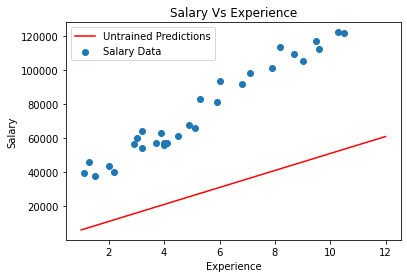

In [56]:
#Plotting Untrained Predictions
experience = data['YearsExperience']
salary = data['Salary']
plt.scatter(experience, salary, label="Salary Data")
plt.plot(demo_experience, untrained_predictions, label="Untrained Predictions", color="red")
plt.title("Salary Vs Experience")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

[35242.16252012376, 44692.12484157884, 54142.087163033924, 63592.049484489, 73042.01180594409, 82491.97412739915, 91941.93644885422, 101391.89877030932, 110841.86109176438, 120291.82341321948, 129741.78573467454, 139191.7480561296]


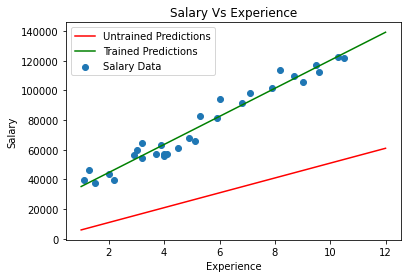

In [57]:
trained_predictions = [ y_hat(x,new_params) for x in demo_experience] #traning model on optimized parameters slope and y_intercept
print(trained_predictions)

plt.scatter(experience, salary, label="Salary Data")
plt.plot(demo_experience, untrained_predictions, label="Untrained Predictions", color="red")

#Plotting results of trained model
plt.plot(demo_experience, trained_predictions, label="Trained Predictions", color="green") 
plt.title("Salary Vs Experience")
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

In [59]:
#Testing model on a new data
new_experience = int(input("Enter experience in years to predict salary: "))
y_hat(new_experience, new_params)

Enter experience in years to predict salary: 4


63592.049484489

Checking Goodness of Fit using R Square Method

In [60]:
def R_square(data, params):
  x,y = data['YearsExperience'], data['Salary']
  y_bar = y.mean()
  x,y = x.to_numpy(), y.to_numpy()
  y_pred = y_hat(x,params)
  ss_r = sum((y - y_pred)**2)
  ss_t = sum((y - y_bar)**2)
  r_square = 1 - (ss_r/ss_t)
  print(r_square)
R_square(data, new_params)

0.9569566641435086


References <br> 
[A Practical Tutorial to Simple Linear Regression Using Python](https://www.analyticsvidhya.com/blog/2021/03/a-practical-tutorial-to-simple-linear-regression-using-python/) <br>
[Dataset](https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression)